## Use pandas and simpleitk to read datasets

In [1]:
%pylab inline
%config InlineBackend.figure_format = 'svg'
import os
import numpy as np
import pandas as pd
from glob import glob

import SimpleITK as sitk

Populating the interactive namespace from numpy and matplotlib


In [2]:
root = '/Users/scp-173/Datasets/RSNA_competiton'
train_data_path = os.path.join(root, 'stage_1_train_images')
test_data_path = os.path.join(root, 'stage_1_test_image')

In [3]:
def loadFile(filename):
    ds = sitk.ReadImage(filename)
    img_array = sitk.GetArrayFromImage(ds)
    return img_array[0]

245 2 154.0230255126953


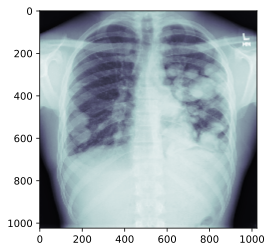

In [30]:
image_sample = loadFile(os.path.join(train_data_path, "00322d4d-1c29-4943-afc9-b6754be640eb.dcm"))
print(image_sample.max(), image_sample.min(), image_sample.mean())
imshow(image_sample, cmap='bone')

### Read csv tables to get message

In [22]:
df_class_info = pd.read_csv(os.path.join(root, 'stage_1_detailed_class_info.csv'))
df_class_info.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [23]:
df_label_info = pd.read_csv(os.path.join(root, 'stage_1_train_labels.csv'))
df_label_info.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [24]:
patientId_lst = list(df_label_info['patientId'].values)
len(patientId_lst)

28989

In [27]:
df_label_info[df_label_info['patientId']=='78221b16-5fd9-4a99-a966-56b693c2e5d7']

,patientId,x,y,width,height,Target
11583,78221b16-5fd9-4a99-a966-56b693c2e5d7,569.0,296.0,215.0,473.0,1
11584,78221b16-5fd9-4a99-a966-56b693c2e5d7,102.0,295.0,189.0,349.0,1
11585,78221b16-5fd9-4a99-a966-56b693c2e5d7,104.0,666.0,227.0,126.0,1


In [28]:
df_class_info[df_class_info['patientId']=='78221b16-5fd9-4a99-a966-56b693c2e5d7']

,patientId,class
11583,78221b16-5fd9-4a99-a966-56b693c2e5d7,Lung Opacity
11584,78221b16-5fd9-4a99-a966-56b693c2e5d7,Lung Opacity
11585,78221b16-5fd9-4a99-a966-56b693c2e5d7,Lung Opacity


In [29]:
df = df_label_info.copy()
df.insert(6, 'class', df_class_info['class'])
df.head()

,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity
